## <span style="color:coral"> Exercise 01.1: test the Pseudo-Random Number generator </span>

### Exercise 01.11
Using the uniform Pseudo-Random Number generator (prng) following the RANdom New York University (RANNYU) routine implemented by Kalos and Panoff, we estimate the average of the uniform variate $r$ 
$$\langle r \rangle = \int_0^1 r dr $$
with $10^6$ extractions. The variance is estimated via the blocking method implemented with $10^2$ blocks, and results are plotted with a fixed block size and increasing block numbers. This way, we can observe the average converging towards the exact value $\frac{1}{2}$ and the uncertainty decreasing as $\sqrt{n}$

In [5]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

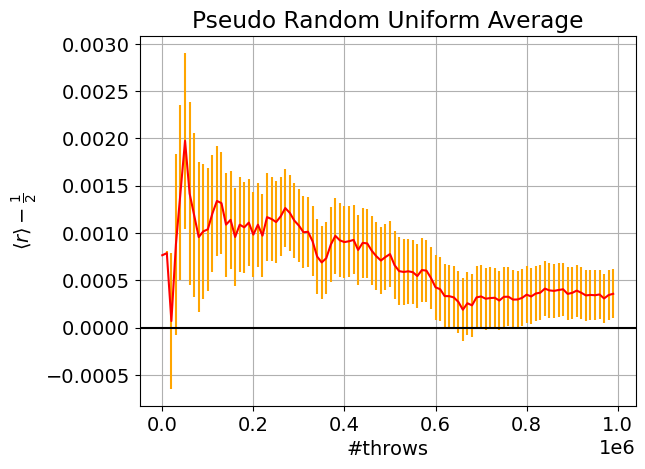

In [6]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex01.11.txt', skiprows=1)
M=1e6                 # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#populate and rescale x axis
x= np.arange(N)*L 
#plot the results with errors
plt.errorbar(x,data[:,0]-0.5,yerr=data[:,1], color="red", ecolor="orange")
plt.xlabel('#throws')
plt.ylabel(r"$\langle r \rangle -\frac{1}{2}$")
plt.grid(True)
plt.axhline(y=0., color= "black",linestyle='-')
plt.title("Pseudo Random Uniform Average")
plt.show()

Since the obtained result in compatible between $2\sigma$ (as a rough estimate) with the expected value, we are satisfied.

### Exercise 01.12
Using our prng and with the same technique, we now evaluate $\sigma^2$ for the uniform distribution $r$. the expected result is 
$$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$

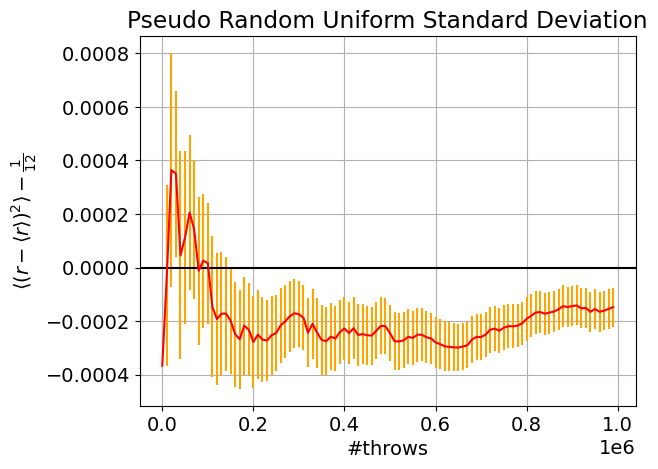

In [7]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex01.12.txt', skiprows=1)
M=1e6                 # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#populate and rescale x axis
x= np.arange(N)*L 
#plot the results with errors
plt.errorbar(x,data[:,0]-1/12,yerr=data[:,1],color="red", ecolor="orange")
plt.xlabel('#throws')
plt.ylabel(r"$\langle(r-\langle r \rangle)^2\rangle-\frac{1}{12}$")
plt.grid(True)
plt.axhline(y=0., color= "black",linestyle='-')
plt.title("Pseudo Random Uniform Standard Deviation")
plt.show()

With $1e6$ realizations, convergence is reached between $2\sigma$. This is an acceptable result. 

### Exercise 01.13
We now check whether Pearson's cumulative test statistic $\chi^2$ rejects the hypothesis: "the data is sampled from an uniform distribution".

To do so we sample the $\chi^2$ 100 times with $10^4$ extractions each time. Then $\chi^2$ average is plotted with its relative standard deviation of the mean (since a $\chi^2$ distribution has finite variance, according to the central limit theorem a sum of variables distributed as $\chi^2$ follows a Gaussian pdf).

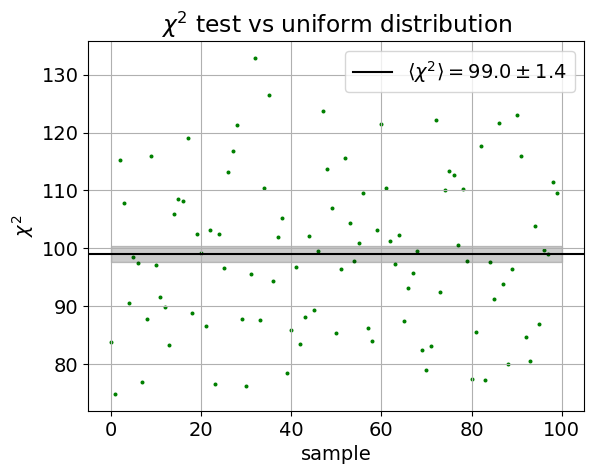

In [8]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex01.13.txt', skiprows=1)
Nrealizations=1e4           # Number of extractions per chi-squared evaluation
Nevaluations=100            # Number of evaluations
#plot the chi-squared for the sampled realizations
x= np.arange(Nevaluations)
plt.scatter(x,data,color="green", s=3.5)
plt.xlabel('sample')
plt.ylabel(r"$\chi^2$")
plt.grid(True)
#evaluate and plot chi-squared mean
chiMean=np.mean(data)
chiStd=np.std(data, ddof=1)/np.sqrt(Nevaluations-1)
plt.axhline(y=chiMean, color="black", label = fr"$\langle \chi^2 \rangle = {chiMean:1.1f} \pm {chiStd:1.1f}$")
plt.fill_between(range(101),chiMean-chiStd,chiMean+chiStd, color="black",alpha=0.2) 
plt.title(r"$\chi^2$ test vs uniform distribution")
plt.legend()
plt.show()

We now:
- plot the histogram of the sampled $\chi^2$
- fit the data with the pdf followed by $\chi^2$ $$ P(x)=Nx^{\frac{k}{2}-1}e^{-\frac{x}{2}} $$ so to find the most likely number of degrees of freedom for the pdf, $k$. 
- $k$ is also the $\chi^2$ mean value, thus we are satisfied with the consistency of the results 
- since both the results are also compatible with the expected value $99$, we are allowed to conclude that the $\chi^2$ test fails (i.e it fails to reject the hypothesis "the data is sampled from an uniform distribution")
- as an example, a greater or smaller value of the averaged $\chi^2$ would have corresponded to the low probability tails of $P(x)$, leaning toward a rejection of the uniform probability origin of sampled data.

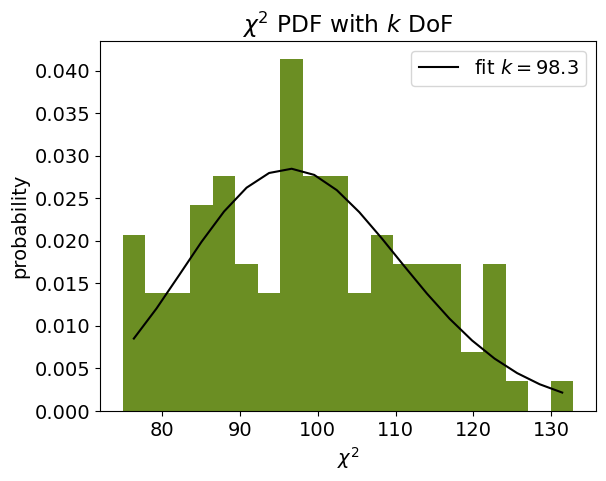

In [9]:
#create a histogram with the sampled chi-squared
n, bins, patches = plt.hist(data,color="olivedrab", bins=20, density=True)

from scipy.optimize import curve_fit

# Define the chi-squared function
def chiSquared(x, amplitude, k):
    return amplitude * np.exp(-x/2) * x**(k/2-1)

# Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the histogram to the chi-squared function
popt, pcov = curve_fit(chiSquared, bin_centers, n, p0=[0,100])

# Plot the fitted chi-squared curve
plt.xlabel(r'$\chi^2$')
plt.ylabel(r"probability")
plt.plot(bin_centers, chiSquared(bin_centers, *popt), color='black', label =fr"fit $k={popt[1]:1.1f}$")
plt.legend()
plt.title("$\chi^2$ PDF with $k$ DoF")
plt.show()


To realize the previous and following fit, the **_curve_fit_** function from the scipy.optimize module is used:

it is a non-linear least-squares optimization algorithm that fits a user-defined function to data. Specifically, it uses the Levenberg-Marquardt algorithm, which is a widely used optimization algorithm for solving non-linear least-squares problems.

The Levenberg-Marquardt algorithm combines the features of both the gradient descent method and the Gauss-Newton method. It starts with an initial guess for the optimal parameters and iteratively adjusts the parameters to minimize the sum of the squared residuals between the data and the user-defined function.

## <span style="color:coral"> Exercise 01.2: Central Limit Theorem </span>

In this exercise we will explore Central Limit Theorem consequences by taking a look to a random variable(RV) defined as:
1) sum of RVs uniformly distributed 

2) sum of RVs exponentially distributed

3) sum of RVs distributed as a Cauchy-Lorentz distribution  

in particular, as the number of simple RVs summed increases(1,2,10,100), (1) and (2) will converge to a gaussian pdf, while (3) will converge to a Cauchy-Lorentz distribution. For each simple RV we extract $10^4$ samples, using the rannyu routine naked in the first case, and paired with inverse function sampling for (2) and (3).

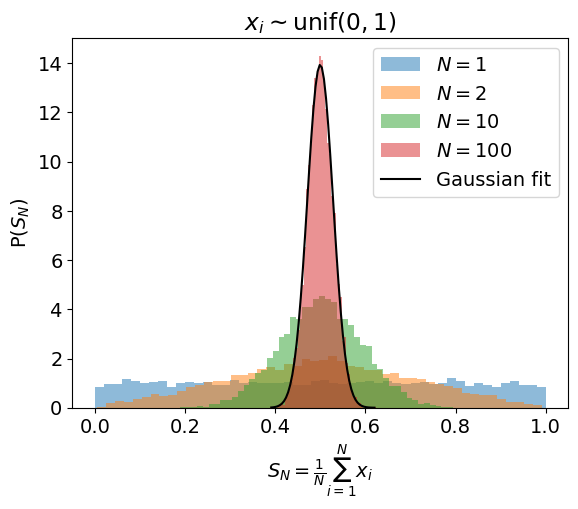

In [10]:
#load sampled data
data = np.loadtxt('ex01.21.txt', skiprows=1)

#prepare the x axis
Nbins=100
x= np.arange(Nbins)

#plot parameters
N=[1,2,10,100]
plt.ylabel('P$(S_N)$')
plt.xlabel(r"$S_N = \frac{1}{N}\sum_{i=1}^N x_i$")
plt.title(r"$x_i \sim \mathrm{unif}(0,1)$")

# Define the width of the columns
width = 1.

for i in range(4):
# Plot the data as column scatter plot
    n, bins, patches = plt.hist(data[:,i],alpha=0.5, bins=50, density=True, label=f"$N={N[i]}$")

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

# Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the histogram to the Gaussian function
popt, pcov = curve_fit(gaussian, bin_centers, n)

# Plot the fitted Gaussian curve
plt.plot(bin_centers, gaussian(bin_centers, *popt), color='black', label="Gaussian fit")
plt.legend()
plt.show()

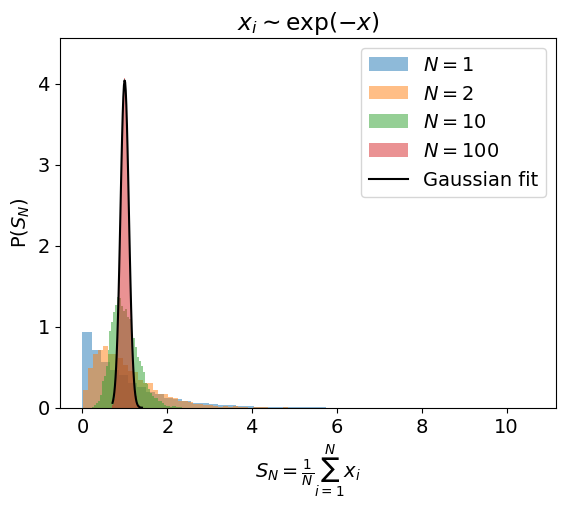

In [11]:
#load sampled data
data = np.loadtxt('ex01.22.txt', skiprows=1)

#prepare the x axis
Nbins=100
x= np.arange(Nbins)
 
#plot parameters
N=[1,2,10,100]
plt.ylabel('P$(S_N)$')
plt.xlabel(r"$S_N = \frac{1}{N}\sum_{i=1}^N x_i$")
plt.title(r"$x_i \sim \exp(-x)$")
    
# Define the width of the columns
width = 1.

for i in range(4):
# Plot the data as column scatter plot
    n, bins, patches = plt.hist(data[:,i],alpha=0.5, bins=50, density=True, label=f"$N={N[i]}$")

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

# Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the histogram to the Gaussian function
popt, pcov = curve_fit(gaussian, bin_centers, n)

# Plot the fitted Gaussian curve
plt.plot(bin_centers, gaussian(bin_centers, *popt), color='black', label="Gaussian fit")
plt.legend()
plt.show()

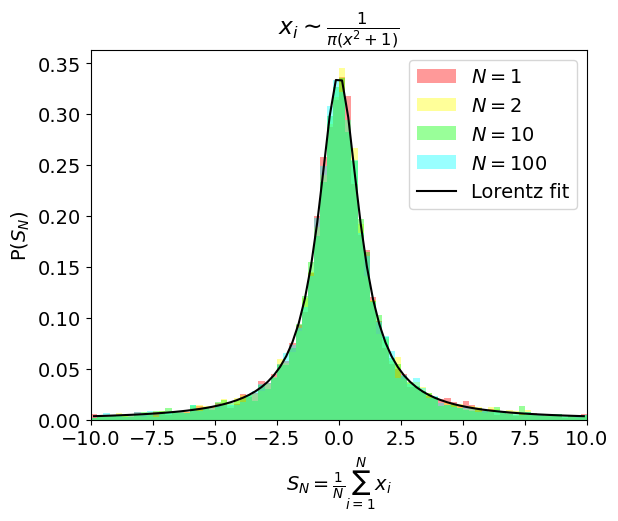

In [12]:
#load sampled data
data = np.loadtxt('ex01.23.txt', skiprows=1)

#prepare the x axis
Nbins=100
x= np.arange(Nbins)
 
#plot parameters
N=[1,2,10,100]
plt.ylabel('P$(S_N)$')
plt.xlabel(r"$S_N = \frac{1}{N}\sum_{i=1}^N x_i$")
plt.title(r"$x_i \sim \frac{1}{\pi(x^2+1)}$")
    
# Define the width of the columns
width = 1.
plt.xlim(xmin=-10, xmax = 10)

colors = ['red', 'yellow', 'lime','cyan']
for i in range(4):
# Plot the data as column scatter plot
    n, bins, patches = plt.hist(data[:,i],alpha=0.4, bins=80, density=True, range=[-10, 10], color = colors[i], label=f"$N={N[i]}$")
    
# Define the Cauchy-Lorentz function
def lorentzian(x, amplitude, gamma, mu):
    return amplitude * gamma/(gamma**2+(x-mu)**2)

# Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1]) / 2

# Fit the histogram to the Gaussian function
popt, pcov = curve_fit(lorentzian, bin_centers, n)

# Plot the fitted Cauchy-Lorentz curve
plt.plot(bin_centers, lorentzian(bin_centers, *popt), color='black', label="Lorentz fit")
plt.legend()
plt.show()

## <span style="color:coral"> Exercise 01.3: Buffon Experiment: Estimation of $\pi$ </span>

If we imagine throwing a needle of lenght $L$ on a field run by parallel lines with distanc $d$, as we count the number $N_\mathrm{hit}$ of times the needle intersects a line we get an estimator of $\pi$:
$$\pi = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

we estimated $\pi$ with $10^8$ throws and blocking average with $10^2$ blocks. In each block a value of $\pi$ is calculated, and then average and standard deviation are calculated among blocks with the usual method.

In order to know if the needle intersects a line, the problem may be simplified exploiting its simmetries: just the center of mass coordinate orthogonal to the lines and the needle orientation are needed.

To sample the orientation of the needle without using the value of $\pi$, an accept/reject algorithm is used: a point (two coordinate) are generated in the unitary first quadrant quarter-circle (two uniform samples), but only such points with square modulus lesser than one are accepted. From the accepted points we extract the orientation from e.g. the sine (y-projection). Such a method is not efficient, but we believe it to be a good workaround to solve the task.

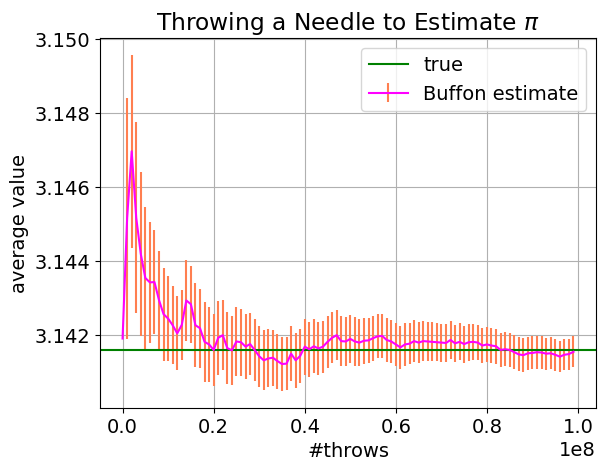

In [14]:
#load sampled data
data = np.loadtxt('ex01.31.txt', skiprows=1)

M=1e8                 # Total number of throws
N=1e2                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

#populate and rescale x axis
x= np.arange(N)*L 
#plot
plt.errorbar(x,data[:,0],yerr=data[:,1], ecolor="coral",color="magenta",label="Buffon estimate")
plt.axhline(y = np.pi, color = 'g', linestyle = '-',label="true")
plt.xlabel('#throws')
plt.ylabel(r"average value")
plt.grid(True)
plt.title(r"Throwing a Needle to Estimate $\pi$" )
plt.legend()
plt.show()

The results are in agreement with the known value of $\pi$

Addendum: the choice of the number of throws and the number of blocks depends on the correlations of the pseudo-random number generator used with the experiment one wants to perform.

Ideally one would use all the throws to build up to a nice average with small error (i.e. block_size = 1). However, in order to eliminate correlations among the prng and between the pnrg and the problem block_size should be greater than 1.

In these exercises no stress was destined to this topic, and we always choosed Nblocks=100 just for plot purposes.